In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [3]:
#reading our dataset
data = pd.read_csv(r"C:\Users\FELIX\Desktop\Capstone Project\fake_job_postings.csv")
data.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [4]:
#Checking Column Names
data.columns


Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
#Checking the datatypes
data.dtypes


job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [6]:
#Check for missing values
data.isnull().sum().sort_values(ascending=False)


salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
title                      0
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
fraudulent                 0
dtype: int64

Checking and Filling Missing Columns

In [7]:
#Fill missing text columns
text_cols = [
    'title',
    'company_profile',
    'description',
    'requirements',
    'benefits'
]

data[text_cols] = data[text_cols].fillna("")


In [77]:
#Fill missing categorical columns
meta_cols = [
    'employment_type',
    'required_experience',
    'required_education',
    'industry',
    'function'
]

data[meta_cols] = data[meta_cols].fillna("Unknown")


Remove Duplicates

In [8]:
#Remove duplicate job posting
data.duplicated().sum()  #Checks for duplicates

data = data.drop_duplicates() #Removes duplicates



In [9]:
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [10]:
#convert text columns to lower case
for columns in text_cols:
    data[columns] = data[columns].str.lower()

In [11]:
#Remove extra spaces

for col in text_cols:
    data[col] = data[col].str.replace(r"\s+", " ", regex=True)


Thorough Sanity Checks 

In [78]:
#Sanity Checks

data.isnull().sum()


job_id                 0
title                  0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
state                  0
city                   0
final_text             0
text_length            0
fraud_label            0
salary_class           0
fraud_probability      0
dtype: int64

In [13]:
data[['location', 'department', 'salary_range']].isnull().sum()


location          346
department      11547
salary_range    15012
dtype: int64

In [14]:
data['location'] = data['location'].fillna("Unknown")


In [15]:
data['department'] = data['department'].fillna("Unknown")


In [16]:
data['salary_range'] = data['salary_range'].fillna("Not specified")


In [79]:
#Final sanity check
data.isnull().sum()

job_id                 0
title                  0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
state                  0
city                   0
final_text             0
text_length            0
fraud_label            0
salary_class           0
fraud_probability      0
dtype: int64

In [18]:
#confirming that there are no nulls in text columns
data[text_cols].isnull().sum()


title              0
company_profile    0
description        0
requirements       0
benefits           0
dtype: int64

In [19]:
# Function to split location into country, state, city
def clean_location(loc):
    if pd.isna(loc):
        return pd.Series(['', '', ''])
    
    parts = [p.strip() for p in loc.split(',')]
    
    # Handle cases with more than 3 parts
    if len(parts) > 3:
        country = parts[0]
        state = parts[1]
        city = ', '.join(parts[2:])
    else:
        # Pad missing parts with empty strings
        parts += [''] * (3 - len(parts))
        country, state, city = parts
    
    return pd.Series([country, state, city])

# Apply function to your data
data[['country', 'state', 'city']] = data['location'].apply(clean_location)

# Optional: drop the original location column
data = data.drop(columns=['location'])

# Check the result
print(data.head(10))

   job_id                                      title  department  \
0       1                           marketing intern   Marketing   
1       2  customer service - cloud video production     Success   
2       3    commissioning machinery assistant (cma)     Unknown   
3       4          account executive - washington dc       Sales   
4       5                        bill review manager     Unknown   
5       6                           accounting clerk     Unknown   
6       7                      head of content (m/f)  ANDROIDPIT   
7       8             lead guest service specialist      Unknown   
8       9                                 hp bsm sme     Unknown   
9      10    customer service associate - part time      Unknown   

    salary_range                                    company_profile  \
0  Not specified  we're food52, and we've created a groundbreaki...   
1  Not specified  90 seconds, the worlds cloud video production ...   
2  Not specified  valor services provi

In [92]:
import pycountry

# Function to convert country code to full name
def get_country_name(code):
    if not code or pd.isna(code):
        return ''
    code = str(code).strip().upper()
    try:
        # Try alpha_2 code first
        country = pycountry.countries.get(alpha_2=code)
        if country:
            return country.name
        # Try alpha_3 code
        country = pycountry.countries.get(alpha_3=code)
        if country:
            return country.name
        return code  # fallback: return as-is
    except:
        return code

# Apply to country column
data['country'] = data['country'].apply(get_country_name)

# Clean state and city columns
data['state'] = data['state'].fillna('').str.strip().str.title()
data['city'] = data['city'].fillna('').str.strip().str.title()

# Optional: create a combined clean_location for plotting
data['clean_location'] = data.apply(
    lambda x: ', '.join(filter(None, [x['city'], x['state'], x['country']])),
    axis=1
)

# Check results
print(data[['country','state','city','clean_location']].head(20))



           country state              city  \
0    United States    Ny          New York   
1      New Zealand                Auckland   
2    United States    Ia             Wever   
3    United States    Dc        Washington   
4    United States    Fl        Fort Worth   
5    United States    Md                     
6          Germany    Be            Berlin   
7    United States    Ca     San Francisco   
8    United States    Fl         Pensacola   
9    United States    Az           Phoenix   
10   United States    Nj       Jersey City   
11  United Kingdom   Lnd            London   
12   United States    Ct          Stamford   
13   United States    Fl           Orlando   
14       Australia   Nsw            Sydney   
15       Singapore    01         Singapore   
16          Israel        Tel Aviv, Israel   
17  United Kingdom   Sos   Southend-On-Sea   
18   United States    Ny          New York   
19   United States    Pa     Usa Northeast   

                          clean_l

In [61]:
#Saving the cleaned Data
import os

# Define folder and filename
folder = r"C:\Users\FELIX\Documents\Capstone Project"
filename = "cleaned_fake_job_posting.csv"
filepath = os.path.join(folder, filename)

# Create the folder if it doesn't exist
os.makedirs(folder, exist_ok=True)

# Save the CSV
data.to_csv(filepath, index=False)

print(f"File saved successfully at: {filepath}")


File saved successfully at: C:\Users\FELIX\Documents\Capstone Project\cleaned_fake_job_posting.csv


In [20]:
#Let's combine all of them

data['final_text'] = (
    data[text_cols]
    .astype(str)
    .agg(' '.join, axis=1)
)


In [21]:
#Remove extra spaces
data['final_text'] = data['final_text'].str.replace(r'\s+', ' ', regex=True)


In [22]:
#Remove leading/trailing spaces
data['final_text'] = data['final_text'].str.strip()


In [23]:
#Inspect the final text
data[['final_text']].head(10)


,final_text
0,"marketing intern we're food52, and we've creat..."
1,customer service - cloud video production 90 s...
2,commissioning machinery assistant (cma) valor ...
3,account executive - washington dc our passion ...
4,bill review manager spotsource solutions llc i...
5,accounting clerk job overviewapex is an enviro...
6,"head of content (m/f) founded in 2009, the fon..."
7,lead guest service specialist airenvy’s missio...
8,hp bsm sme solutions3 is a woman-owned small b...
9,customer service associate - part time novitex...


In [80]:
#Check text length
data['text_length'] = data['final_text'].str.len()


In [81]:
#Sanity Checks
data['final_text'].isnull().sum()
data['text_length'].describe()


count    17880.000000
mean      2653.063758
std       1447.168006
min         14.000000
25%       1587.750000
50%       2507.000000
75%       3453.000000
max      14881.000000
Name: text_length, dtype: float64

Exploratory Data Analysis on Cleaned Data


In [82]:
data.shape

(17880, 25)

In [83]:
#Target Distribution
data['fraudulent'].value_counts()


fraudulent
0    17014
1      866
Name: count, dtype: int64

In [84]:
#In Percentage
data['fraudulent'].value_counts(normalize=True) * 100


fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64

KPIS

In [111]:
#Total Number of Jobs
unique_jobs = data['job_id'].nunique()
print("Total number of unique jobs:", unique_jobs)

Total number of unique jobs: 17880


In [106]:
#Fraud Percentage (KPI)
fraud_rate = data['fraudulent'].mean() * 100
print(fraud_rate)


4.8434004474272925


In [105]:
#High-Risk Job Count
high_risk_count = (data['fraud_probability'] >= 0.7).sum()

print(high_risk_count)


307


In [104]:
#Average Fraud Risk Score
avg_risk = data['fraud_probability'].mean()



print(avg_risk)

0.047917623981385396


In [107]:
#Maximum Fraud Risk (Worst Case)
max_risk = data['fraud_probability'].max()

print(max_risk)


0.9642310958829624


In [108]:
#Fraud Concentration (Top 10%)
top_10pct_risk = data['fraud_probability'].quantile(0.9)

print(top_10pct_risk)


0.0752356642094626


Visulaising Fraud Vs Real Job

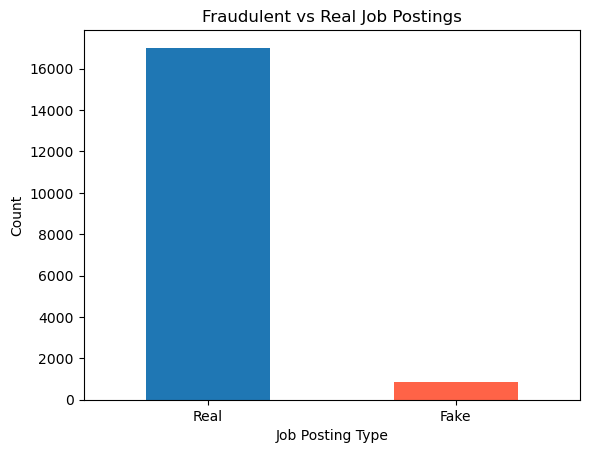

In [85]:
#How big is the fraud problem?

# Map values to readable labels
labels = data['fraudulent'].map({0: 'Real', 1: 'Fake'})

# Define colors in the order of the bars
colors = ['#1f77b4', 'tomato']  # Real first, Fake second

# Plot
labels.value_counts().plot(kind='bar', color=colors)
plt.title("Fraudulent vs Real Job Postings")
plt.xlabel("Job Posting Type")
plt.ylabel("Count")
plt.xticks(rotation=0)  # optional, keeps x labels horizontal
plt.show()



Text length vs fraud

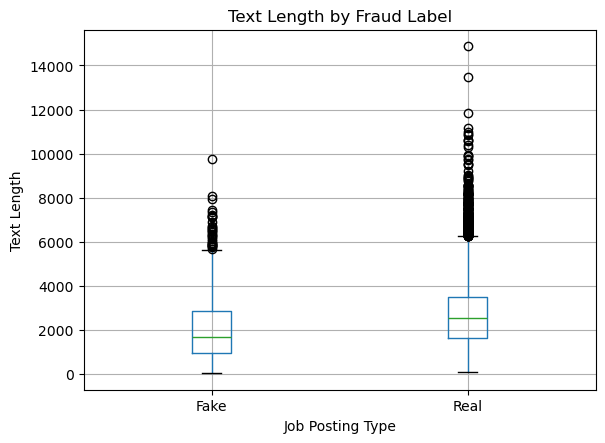

In [87]:
# Create readable label column
data['fraud_label'] = data['fraudulent'].map({0: 'Real', 1: 'Fake'})

# Boxplot
data.boxplot(column='text_length', by='fraud_label')

plt.title("Text Length by Fraud Label")
plt.suptitle("")   # remove automatic title
plt.xlabel("Job Posting Type")
plt.ylabel("Text Length")
plt.show()



Employment type vs fraud

fraudulent            Real      Fake
employment_type                     
Part-time        90.715182  9.284818
Unknown          93.056756  6.943244
Other            93.392070  6.607930
Full-time        95.783133  4.216867
Contract         97.112861  2.887139
Temporary        99.170124  0.829876


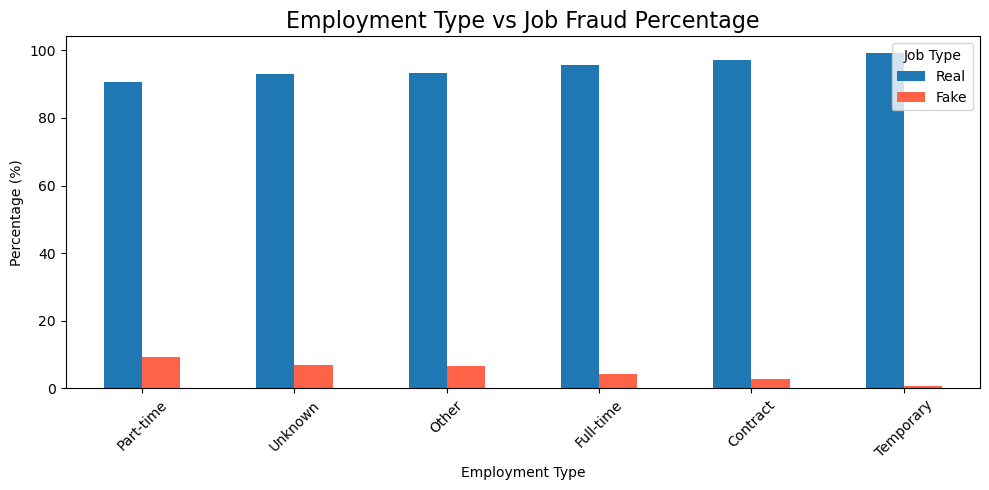

In [88]:
# Create crosstab, normalize, sort, and convert to percentages
ct = pd.crosstab(
    data['employment_type'],
    data['fraudulent'],
    normalize='index'
).sort_values(by=1, ascending=False) * 100

# Rename columns: 0 -> Real, 1 -> Fake
ct.rename(columns={0: 'Real', 1: 'Fake'}, inplace=True)

print(ct)
#Plot Chart
ct.plot(kind='bar', figsize=(10,5), color=['#1f77b4', 'tomato'])
plt.title('Employment Type vs Job Fraud Percentage', fontsize=16)
plt.ylabel('Percentage (%)')
plt.xlabel('Employment Type')
plt.xticks(rotation=45)
plt.legend(title='Job Type')
plt.tight_layout()
plt.show()




Required Experience Vs. Fraud

fraudulent                Real      Fake
required_experience                     
Executive            92.907801  7.092199
Entry level          93.362996  6.637004
Unknown              93.829787  6.170213
Not Applicable       94.623656  5.376344
Director             95.629820  4.370180
Mid-Senior level     97.033342  2.966658
Internship           97.375328  2.624672
Associate            98.171528  1.828472


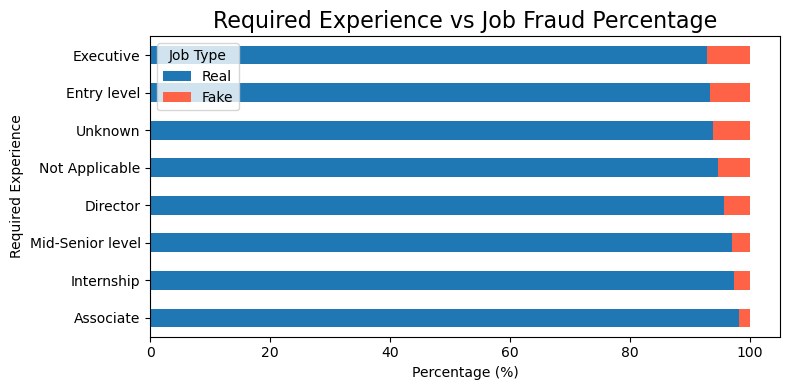

In [89]:
pd.crosstab(
    data['required_experience'],
    data['fraudulent'],
    normalize='index'
)


# Create crosstab, normalize, sort, and convert to percentages
ct = pd.crosstab(
    data['required_experience'],
    data['fraudulent'],
    normalize='index'
).sort_values(by=1, ascending=False) * 100

# Rename columns: 0 -> Real, 1 -> Fake
ct.rename(columns={0: 'Real', 1: 'Fake'}, inplace=True)

print(ct)
#Plot Chart
ct.plot(
    kind='barh',
    stacked=True,
    figsize=(8, 4),
    color=['#1f77b4', 'tomato']
)

plt.title('Required Experience vs Job Fraud Percentage', fontsize=16)
plt.xlabel('Percentage (%)')
plt.ylabel('Required Experience')
plt.legend(title='Job Type')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Required Education Vs. Fraud

fraudulent                           Real (%)   Fake (%)
required_education                                      
Some High School Coursework         25.925926  74.074074
Certification                       88.823529  11.176471
High School or equivalent           91.826923   8.173077
Master's Degree                     92.548077   7.451923
Unknown                             94.435534   5.564466
Professional                        94.594595   5.405405
Unspecified                         95.633500   4.366500
Doctorate                           96.153846   3.846154
Some College Coursework Completed   97.058824   2.941176
Associate Degree                    97.810219   2.189781
Bachelor's Degree                   98.056365   1.943635
Vocational                         100.000000   0.000000
Vocational - Degree                100.000000   0.000000
Vocational - HS Diploma            100.000000   0.000000


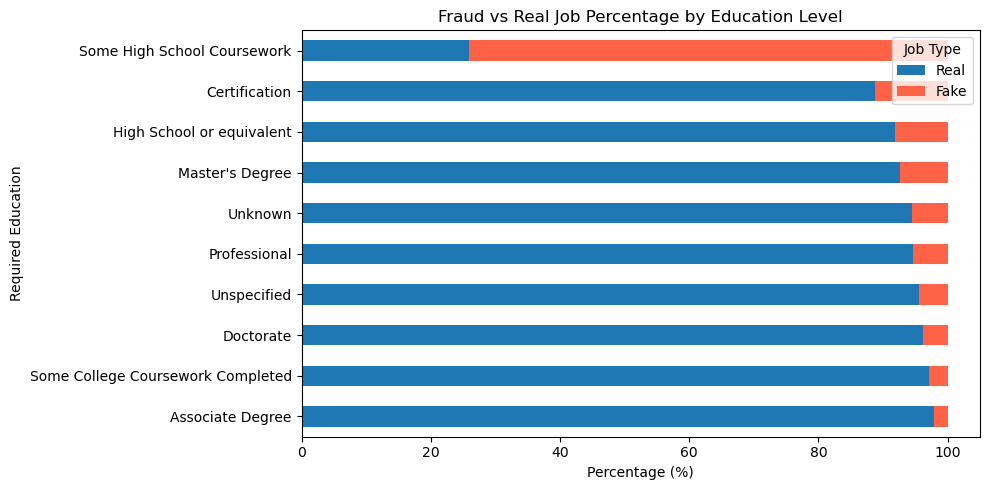

In [97]:
# Select top 10 education levels with highest fraud %
# Create percentage table
edu_counts = (
    data.groupby('required_education')['fraudulent']
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)

# Rename columns for clarity
edu_counts = edu_counts.rename(columns={0: 'Real (%)', 1: 'Fake (%)'})

# Rank by Fake jobs (descending)
edu_counts = edu_counts.sort_values(by='Fake (%)', ascending=False)

# Print ranked table
print(edu_counts)

#Top 10 most fraudulent education levels
top10 = edu_counts.head(10).index   

edu_counts.loc[top10].plot(
    kind='barh',
    stacked=True,
    figsize=(10,5),
    color=['#1f77b4', 'tomato']
)

plt.title('Fraud vs Real Job Percentage by Education Level')
plt.xlabel('Percentage (%)')
plt.ylabel('Required Education')
plt.legend(['Real', 'Fake'], title='Job Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



Location vs Fraud (Top locations)

fraudulent  Real  Fake
country               
US          9926   730
AU           174    40
GB          2361    23
Unknown      327    19
CA           445    12
IN           272     4
PH           131     1
DE           383     0
GR           940     0
NZ           333     0


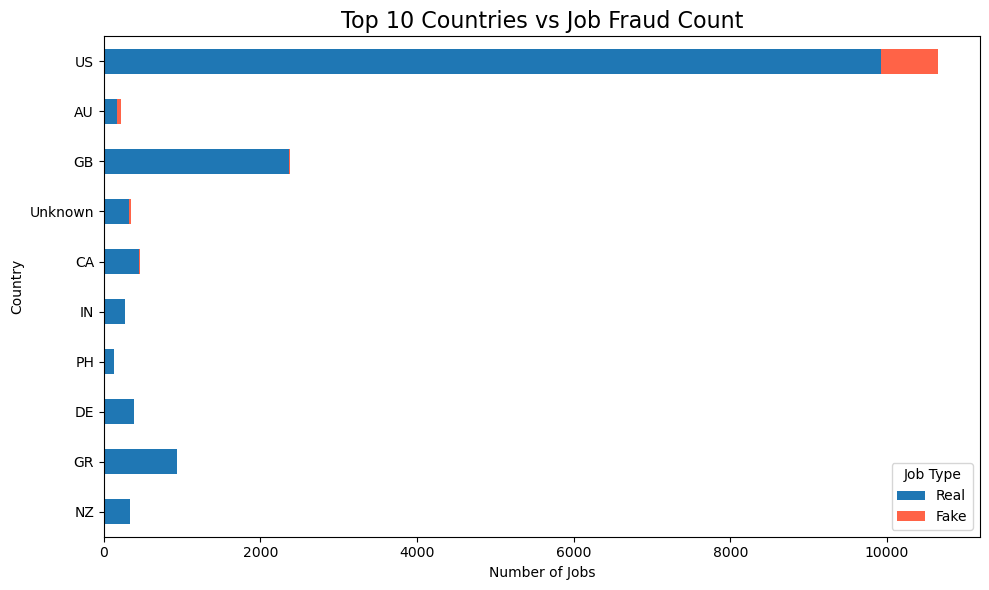

In [34]:
# Top 10 country
top_locations = data['country'].value_counts().head(10).index

# Crosstab with counts (no normalize)
ct = pd.crosstab(
    data[data['country'].isin(top_locations)]['country'],
    data['fraudulent']
)

# Rename columns
ct.rename(columns={0: 'Real', 1: 'Fake'}, inplace=True)

# Optional: sort by number of Fake jobs descending
ct_sorted = ct.sort_values(by='Fake', ascending=False)

print(ct_sorted)

# Plot horizontal stacked bar chart
ct_sorted.plot(kind='barh', stacked=True, figsize=(10,6), color=['#1f77b4', 'tomato'])

plt.title('Top 10 Countries vs Job Fraud Count', fontsize=16)
plt.xlabel('Number of Jobs')
plt.ylabel('Country')
plt.legend(title='Job Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Salary Range Insight

In [35]:
#Let's define a salary range function
def classify_salary_range(salary):
    # Handle missing / not specified
    if pd.isna(salary) or salary == 'Not specified':
        return 'Not specified'
    
    try:
        low, high = salary.split('-')
        low, high = int(low), int(high)
        avg_salary = (low + high) / 2

        if avg_salary < 40000:
            return 'Low'
        elif avg_salary <= 70000:
            return 'Mid'
        else:
            return 'High'
    except:
        return 'Not specified'

#Apply the function
data['salary_class'] = data['salary_range'].apply(classify_salary_range)


salary_class
Not specified    15039
Low               1266
Mid                844
High               731
Name: count, dtype: int64


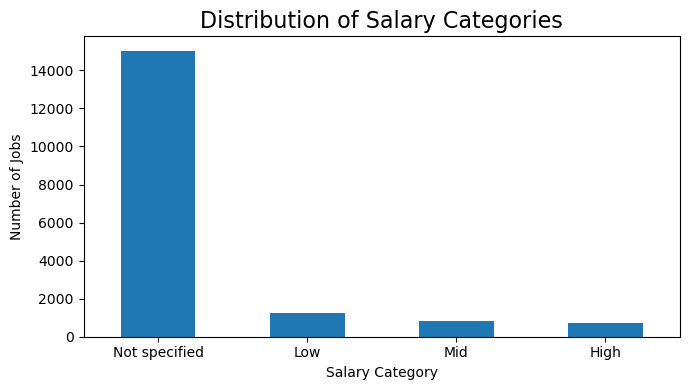

In [73]:
#Check result
data['salary_class'].value_counts()

# Get counts
salary_counts = data['salary_class'].value_counts()

print(salary_counts)

colors = plt.cm.Blues(norm)

# Plot bar chart
salary_counts.plot(kind='bar', figsize=(7,4), color='#1f77b4')

plt.title('Distribution of Salary Categories', fontsize=16)
plt.xlabel('Salary Category')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Do fraud jobs reuse similar text?

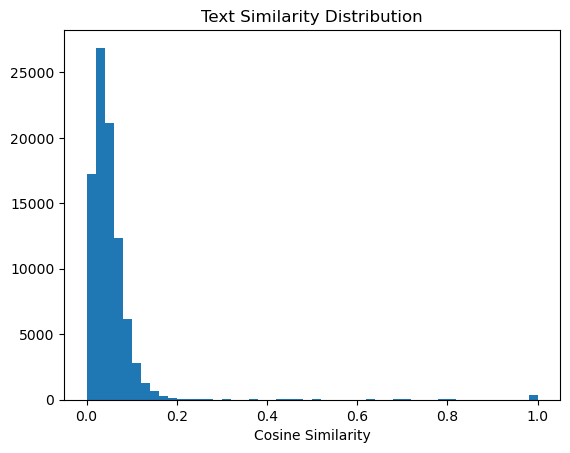

In [77]:
#Are fraud jobs more repetitive?
from sklearn.metrics.pairwise import cosine_similarity

sample = data.sample(300, random_state=42)
tfidf_small = TfidfVectorizer(stop_words='english')
X_small = tfidf_small.fit_transform(sample['final_text'])

similarity_matrix = cosine_similarity(X_small)

plt.hist(similarity_matrix.flatten(), bins=50)
plt.title("Text Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.show()


Which words are most associated with fraud?

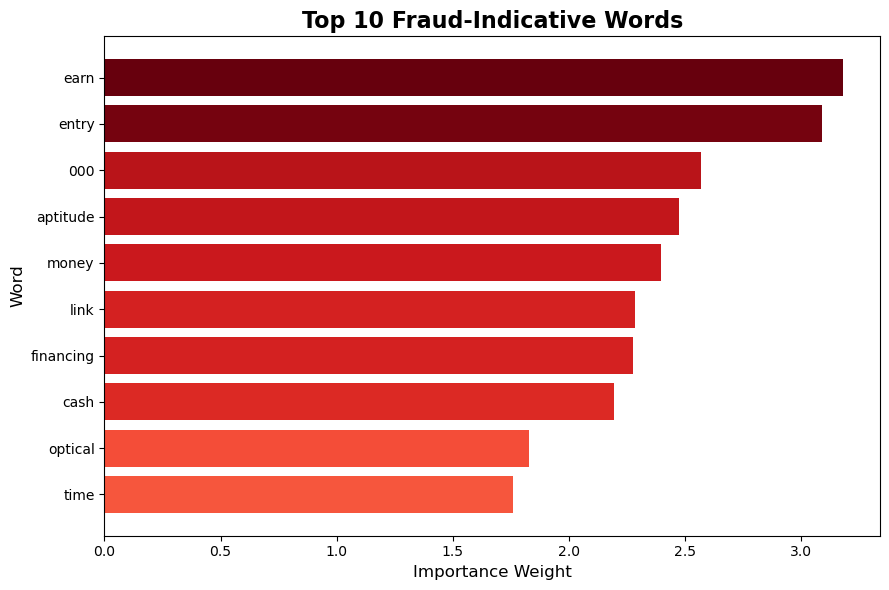

In [70]:
# Sample DataFrame
fraud_data = pd.DataFrame(fraud_words, columns=['word', 'weight'])

# Sort descending & take top 20
top_words = fraud_data.sort_values('weight', ascending=False).head(10)

# Normalize weights for gradient coloring
norm = top_words['weight'] / top_words['weight'].max()

# Create a colormap from light to tomato red
colors = plt.cm.Reds(norm)

# Plot bars manually for gradient
plt.figure(figsize=(9,6))
plt.barh(top_words['word'], top_words['weight'], color=colors)
plt.gca().invert_yaxis()  # largest weight on top

# Titles & labels
plt.title("Top 10 Fraud-Indicative Words", fontsize=16, weight='bold')
plt.xlabel("Importance Weight", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.tight_layout()
plt.show()


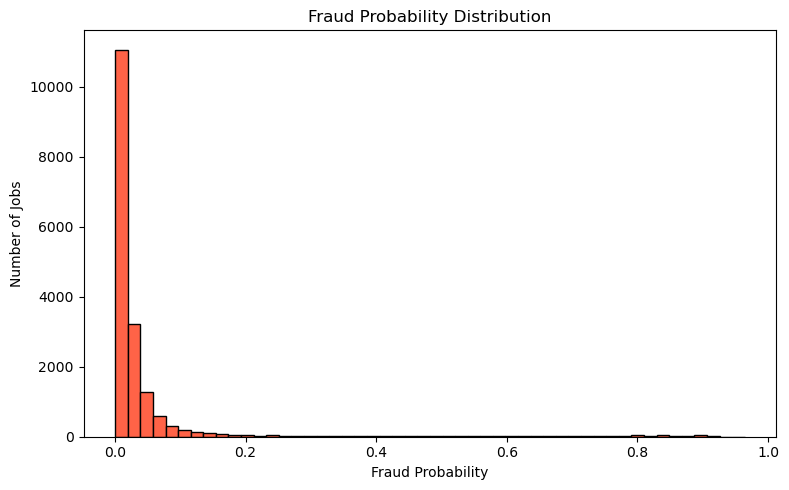

In [71]:
#Fraud Probability Distribution
fraud_probs = model.predict_proba(X)[:, 1]

plt.figure(figsize=(8,5))
plt.hist(fraud_probs, bins=50, color='tomato', edgecolor='black')
plt.title("Fraud Probability Distribution")
plt.xlabel("Fraud Probability")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.show()


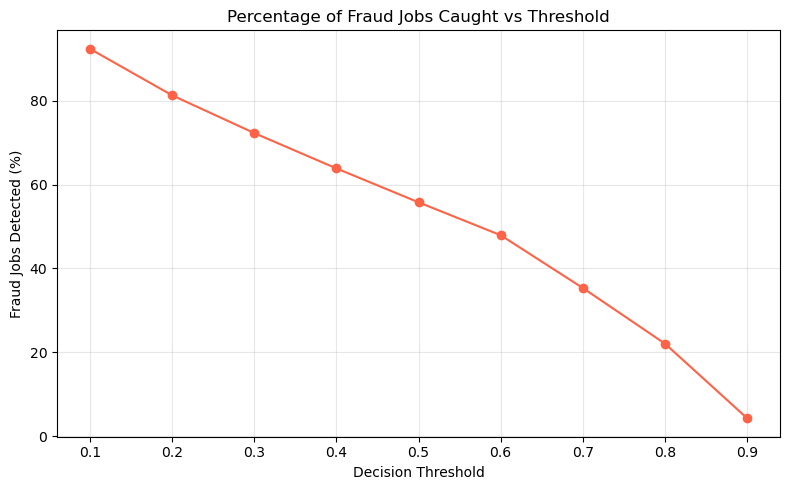

In [98]:
#How many fraud jobs would we catch at different thresholds?

# ----------------------------------------
# Total number of actual fraud cases
# ----------------------------------------
total_fraud = (data['fraudulent'] == 1).sum()

# ----------------------------------------
# Threshold analysis
# ----------------------------------------
thresholds = np.arange(0.1, 1.0, 0.1)
fraud_caught = []

for t in thresholds:
    preds = (fraud_probs >= t).astype(int)
    caught = ((preds == 1) & (data['fraudulent'] == 1)).sum()
    fraud_caught.append(caught)

# ----------------------------------------
# Convert to percentage
# ----------------------------------------
fraud_caught_pct = [(c / total_fraud) * 100 for c in fraud_caught]

# ----------------------------------------
# Plot
# ----------------------------------------
plt.figure(figsize=(8, 5))

plt.plot(
    thresholds,
    fraud_caught_pct,
    marker='o',
    color='tomato'
)

plt.title("Percentage of Fraud Jobs Caught vs Threshold")
plt.xlabel("Decision Threshold")
plt.ylabel("Fraud Jobs Detected (%)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [72]:
#Top High Risk Jobs
data['fraud_probability'] = fraud_probs

data.sort_values(
    'fraud_probability',
    ascending=False
)[['title','fraud_probability']].head(10)


,title,fraud_probability
1857,mechanical technician,0.964231
2075,industrial mechanic,0.960310
2930,data entry clerk,0.956369
17692,administrative assistant,0.956361
2021,subsea process system engineer,0.945995
7424,mechanical technician,0.944965
4350,assembly & test engineer,0.940635
2019,"discipline manager civil, structural, marine,...",0.940538
7207,industrial mechanic,0.937479
14179,director of software engineering,0.930384


FEATURE ENGINEERING

What is TF-IDF?

Imagine:

A word like “job” appears everywhere → not special

A word like “payment” appears mostly in fraud → very special

TF-IDF gives higher weight to special words.

In [40]:
#Import TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [41]:
#Create TF-IDF object
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)


In [42]:
#Fit and Transform Text
X_text = tfidf.fit_transform(data['final_text'])


In [43]:
#Check shape
X_text.shape


(17880, 5000)

META-FEATURES (NON-TEXT)

Now let’s handle:

employment_type

required_experience

required_education

industry

function

These are categories, not text.

In [44]:
meta_features = [
    'employment_type',
    'required_experience',
    'required_education',
    'industry',
    'function'
]

X_meta = data[meta_features]


In [45]:
#Applying One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
X_meta_encoded = encoder.fit_transform(X_meta)


COMBINE TEXT + META FEATURES


In [46]:
#Combine both feature sets
from scipy.sparse import hstack

X = hstack([X_text, X_meta_encoded])


In [47]:
#Target Variable
y = data['fraudulent']


Building Classification Model

PART A: PREPARE TRAIN & TEST DATA⃣ 

Why split the data?

We don’t want the model to:

Memorize answers

Cheat

So we:

Train on some data

Test on unseen data

In [48]:
#Import train-test split
from sklearn.model_selection import train_test_split


In [49]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,              # features we created earlier
    y,              # target (fraudulent)
    test_size=0.2,  # 20% for testing
    random_state=42,
    stratify=y      # VERY IMPORTANT for imbalanced data
)

#Explanation:

#test_size=0.2 → 80% train, 20% test

#stratify=y → keeps fraud ratio the same

PART B: CHOOSE A MODEL
Why Logistic Regression?

Because it:

Is simple

Is fast

Is interpretable

Works VERY well for text problems

In [50]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression


In [51]:
#Create the model
model = LogisticRegression(max_iter=1000)

"""
Why max_iter=1000?

Text data is large

Model needs time to learn
"""


'\nWhy max_iter=1000?\n\nText data is large\n\nModel needs time to learn\n'

PART C: TRAIN THE MODEL

In [52]:
#Fit the model (THIS IS LEARNING)
model.fit(X_train, y_train)

"""
What just happened?

Model learned patterns

It adjusted weights for each word & feature
"""


'\nWhat just happened?\n\nModel learned patterns\n\nIt adjusted weights for each word & feature\n'

PART D: MAKE PREDICTIONS

In [53]:
#Predict on test data
y_pred = model.predict(X_test)


PART E: EVALUATE THE MODEL

In [54]:
#Import evaluation tools
from sklearn.metrics import classification_report, confusion_matrix


In [55]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)


array([[3403,    0],
       [  84,   89]])

In [56]:
#Classification Report
print(classification_report(y_test, y_pred))


#Precision (fraud) → How many predicted frauds were actually fraud

#Recall (fraud) → How many frauds we successfully caught

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.51      0.68       173

    accuracy                           0.98      3576
   macro avg       0.99      0.76      0.83      3576
weighted avg       0.98      0.98      0.97      3576



UNDERSTAND MODEL COEFFICIENTS
What are coefficients?

Positive weight → pushes toward fraud

Negative weight → pushes toward real job

In [57]:
#Get model coefficients
coefficients = model.coef_[0]


In [58]:
#Get TF-IDF feature names (words)
feature_names = tfidf.get_feature_names_out()


In [59]:
#Zip words and coefficients together
word_weights = list(zip(feature_names, coefficients))


In [60]:
#Sort by highest fraud impact
fraud_words = sorted(
    word_weights,
    key=lambda x: x[1],
    reverse=True
)[:20]

fraud_words


[('earn', np.float64(3.1795861988934235)),
 ('entry', np.float64(3.0875035097219445)),
 ('000', np.float64(2.568195264314197)),
 ('aptitude', np.float64(2.471882571028002)),
 ('money', np.float64(2.395499585576695)),
 ('link', np.float64(2.2824600679559275)),
 ('financing', np.float64(2.2762606030467962)),
 ('cash', np.float64(2.1938611619797417)),
 ('optical', np.float64(1.8297581072862859)),
 ('time', np.float64(1.7609201236120842)),
 ('income', np.float64(1.6821900758105774)),
 ('center', np.float64(1.5853875380140792)),
 ('subsea', np.float64(1.5803382569167683)),
 ('facilitating', np.float64(1.5456709695885338)),
 ('internet', np.float64(1.533533636373676)),
 ('encouraged', np.float64(1.529988686107378)),
 ('bahrain', np.float64(1.5051295551657222)),
 ('administrative', np.float64(1.4446700204634326)),
 ('cruise', np.float64(1.420199967443603)),
 ('bonus', np.float64(1.390886171420907))]

In [61]:
#Sort by real-job impact
real_words = sorted(
    word_weights,
    key=lambda x: x[1]
)[:20]

real_words


[('team', np.float64(-2.45958448632348)),
 ('companies', np.float64(-2.3495935434159296)),
 ('website', np.float64(-1.9933553055968463)),
 ('valor', np.float64(-1.8784613202803284)),
 ('care', np.float64(-1.830080911614528)),
 ('search', np.float64(-1.7762533329788022)),
 ('growing', np.float64(-1.6634240447971118)),
 ('recruitment', np.float64(-1.6405317773190298)),
 ('digital', np.float64(-1.6006804182854173)),
 ('clients', np.float64(-1.5314846767854269)),
 ('marketing', np.float64(-1.5028398567953856)),
 ('employment', np.float64(-1.4720532606764465)),
 ('client', np.float64(-1.4388047248842)),
 ('software', np.float64(-1.431636458969661)),
 ('web', np.float64(-1.363795807646854)),
 ('english', np.float64(-1.3555860236548123)),
 ('social', np.float64(-1.3129900996001853)),
 ('right', np.float64(-1.2886291232172724)),
 ('based', np.float64(-1.2634856970058106)),
 ('agency', np.float64(-1.2542725014496436))]

In [62]:
#TF-IDF with bigrams
tfidf_bigram = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2)
)

X_text_bigram = tfidf_bigram.fit_transform(data['final_text'])


In [63]:
#Quickly Retrain Model
X_bigram = hstack([X_text_bigram, X_meta_encoded])

model_bigram = LogisticRegression(max_iter=1000)
model_bigram.fit(X_bigram, y)


LogisticRegression(max_iter=1000)

In [64]:
#Top Fraud Phrases
feature_names_bigram = tfidf_bigram.get_feature_names_out()
coeffs_bigram = model_bigram.coef_[0]

fraud_phrases = sorted(
    zip(feature_names_bigram, coeffs_bigram),
    key=lambda x: x[1],
    reverse=True
)[:20]

fraud_phrases


[('earn', np.float64(3.265348325014754)),
 ('data entry', np.float64(2.9506123212486512)),
 ('link', np.float64(2.8883967721816335)),
 ('money', np.float64(2.7182625270285103)),
 ('aptitude', np.float64(2.5804347105372893)),
 ('000', np.float64(2.5513583221733804)),
 ('work home', np.float64(2.264968576002265)),
 ('cash', np.float64(2.2468677820995007)),
 ('entry', np.float64(2.2199822215300684)),
 ('financing', np.float64(2.19289241796757)),
 ('experience required', np.float64(1.8967401261048566)),
 ('income', np.float64(1.8407550698243476)),
 ('engineering', np.float64(1.822608686101747)),
 ('time', np.float64(1.7319801656397318)),
 ('signing', np.float64(1.6766590209073722)),
 ('encouraged', np.float64(1.6468941418156335)),
 ('email', np.float64(1.6087492107902837)),
 ('duration', np.float64(1.5931133849676935)),
 ('leveraging', np.float64(1.5875856545209708)),
 ('facilitating', np.float64(1.5606173761487452))]

In [65]:
import joblib


In [66]:
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [67]:
joblib.dump(encoder, "onehot_encoder.pkl")


['onehot_encoder.pkl']

In [68]:
joblib.dump(model, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']

In [112]:
import os
os.listdir()


['.ipynb_checkpoints',
 'fake_job_postings_cleaned.xlsx',
 'fraud_detection_model.pkl',
 'onehot_encoder.pkl',
 'Real Vs Fake Job Posting.ipynb',
 'tfidf_vectorizer.pkl']

In [118]:
# Save the three required files
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(encoder, "onehot_encoder.pkl")
joblib.dump(model, "fraud_detection_model.pkl")

print("✅ All 3 files successfully saved in your Capstone Project folder!")
print("")
print("Files created:")
print("   • tfidf_vectorizer.pkl")
print("   • onehot_encoder.pkl")
print("   • fraud_detection_model.pkl")
print("")
print("You can now close this notebook and proceed to create dashboard.py")

✅ All 3 files successfully saved in your Capstone Project folder!

Files created:
   • tfidf_vectorizer.pkl
   • onehot_encoder.pkl
   • fraud_detection_model.pkl

You can now close this notebook and proceed to create dashboard.py
